### Modelo de Regresión de Lasso

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios para realizar la regresión de lasso en Python:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

##### Paso 2: cargar los datos
##### Para este modelo, se usará un conjunto de datos llamado recolectados del videojuego FIFA 17, que contiene información sobre jugadores de fútbol.

In [2]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazamos el valor nan por 0
dataset = dataset.replace(np.nan, "0.0")
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


##### Paso 3: ajuste el modelo de regresión de lazo
##### A continuación, se usará la función LassoCV() de sklearn para ajustar el modelo de regresión de lasso y se usará la función RepeatedKFold() para realizar k-veces la validación cruzada para encontrar el valor alfa óptimo para usar para el término de penalización.
##### Nota: El término «alfa» se usa en lugar de «lambda» en Python.

In [3]:
# definir variables de predicción y respuesta
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [4]:
# definir el modelo
model = Lasso(alpha=1.0)
# definir el método para evaluar el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# forzar los scores a valores positivos
scores = absolute(scores)
print('Factor de Pearson: %.3f (%.3f)' % (mean(scores), std(scores)))

Factor de Pearson: 4.837 (0.085)


In [5]:
# entrenamos el modelo
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# aplicamos el modelo de Lasso
lasso_model = Lasso().fit(X_train,y_train)

In [7]:
# sacamos los interceptores
lasso_model.intercept_

61.30397477733538

In [8]:
# sacamos los coeficientes
lasso_model.coef_

array([-0.20327229,  0.10884158,  0.12149823,  0.07328179,  0.05836948,
       -0.01018474])

In [9]:
# Coefficients for different lambda values.
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,100)

# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

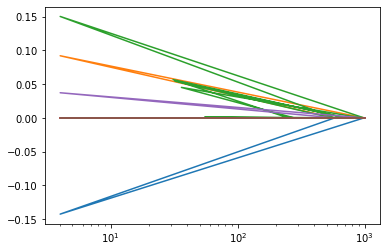

In [10]:
# graficamos los coeficientes
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [11]:
# generamos la prediccion para los 5 primeras columnas con los datos de entrenamiento
lasso_model.predict(X_train)[:5]

array([67.11561668, 60.40988173, 68.35606066, 69.73582567, 63.62594122])

In [12]:
# generamos la prediccion para los 5 primeras columnas con los datos de test
lasso_model.predict(X_test)[:5]

array([61.30397478, 70.42149799, 68.98163407, 62.81063525, 69.27583434])

In [13]:
# generamos la predicción para y
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

6.140673461151962

In [14]:
# generamos el error
r2_score(y_test, y_pred)

0.2576449691230086

In [15]:
# predecimos para datos 
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]
# definimos el modelo
model = Lasso(alpha=1.0)
# entrenamos el modelo
model.fit(X, y)
# definimos los datos
row = [92.0, 92.0, 81.0, 91.0, 33.0, 80.0]
# hacemos la predicción
yhat = model.predict([row])
# predecimos para el modelo
print('Predicted: %.3f' % yhat)

Predicted: 70.293


### Modelo de Regresión de Cresta

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios para realizar la regresión de cresta en Python:

In [16]:
import numpy as np
import pandas as pd
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

##### Paso 2: cargar los datos
##### Para este modelo, se usará un conjunto de datos llamado recolectados del videojuego FIFA 17, que contiene información sobre jugadores de fútbol.

In [17]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazamos el valor nan por 0
dataset = dataset.replace(np.nan, "0.0")
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [18]:
# definir variables de predicción y respuesta
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [19]:
# definimos el modelo
model = Ridge(alpha=1.0)
# definimos el modelo del método de evaluacion 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluamos el modelo
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# forzamos los scores a positivos
scores = absolute(scores)
print('Factor de Pearson: %.3f (%.3f)' % (mean(scores), std(scores)))

Factor de Pearson: 4.838 (0.086)


In [20]:
# entrenamos el modelo
model.fit(X, y)

Ridge()

In [21]:
# definimos los datos
row = [92.0, 92.0, 81.0, 91.0, 33.0, 80.0]
yhat = model.predict([row])

In [22]:
# generamos la predicción para y
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

6.140673461151962

In [23]:
# generamos el error
r2_score(y_test, y_pred)

0.2576449691230086

In [24]:
# predecimos para el modelo
print('Predicted: %.3f' % yhat)

Predicted: 70.193


### Modelo de Regresión Descenso de gradiente

##### Paso 1: importar los paquetes necesarios

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.linear_model import SGDRegressor

In [26]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [27]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [28]:
# Separar los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7,random_state=42) # 70% entrenamiento y 30% prueba

In [29]:
# inicializacion del modelo 
sdg = SGDRegressor()
# Entrenar el modelo con los datos x_train y y_train
sdg.fit(x_train, y_train)

SGDRegressor()

In [30]:
# Valor de prediccion
y_pred = sdg.predict(x_test)

In [31]:
# r2_score
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: -290704953059783038992384.000


In [32]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 14865194144166678787784704.000


In [33]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.000


In [34]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.2f"%r)

Factor de Pearson: -0.30


In [35]:
# Presicion del modelo
print("Precision del modelo: ", sdg.score(x_test, y_test))

Precision del modelo:  -2.9070495305978304e+23


### Modelo de Regresión Random Forest

##### Paso 1: importar los paquetes necesarios

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [38]:
# Visualizamos la correlacion de los datos
dataset.corr()

,overall,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.154351,0.344575,0.376797,0.320635,0.261255,0.274340
pace,0.154351,1.000000,0.797763,0.844260,0.912130,0.538601,0.793932
shooting,0.344575,0.797763,1.000000,0.876042,0.912516,0.342928,0.714540
passing,0.376797,0.844260,0.876042,1.000000,0.955574,0.642659,0.821911
dribbling,0.320635,0.912130,0.912516,0.955574,1.000000,0.543288,0.803232
defending,0.261255,0.538601,0.342928,0.642659,0.543288,1.000000,0.797541
physic,0.274340,0.793932,0.714540,0.821911,0.803232,0.797541,1.000000


In [39]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [40]:
# Separar los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42) # 70% entrenamiento y 30% prueba

In [41]:
# Iniciar el modelo
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
# Generar una prediccion
y_pred = forest.predict(x_test)

In [43]:
# r2_score
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: 0.814


In [44]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 9.466


In [45]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.929


In [46]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.3f"%r)

Factor de Pearson: 0.902


In [47]:
# Presicion del modelo
print("Precision del modelo: ", forest.score(x_test, y_test))

Precision del modelo:  0.23182441700960219


### Modelo de Regresión Support Vector Machine

##### Paso 1: importar los paquetes necesarios

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

In [49]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [50]:
# Visualizamos la correlacion de los datos
dataset.corr()

,overall,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.154351,0.344575,0.376797,0.320635,0.261255,0.274340
pace,0.154351,1.000000,0.797763,0.844260,0.912130,0.538601,0.793932
shooting,0.344575,0.797763,1.000000,0.876042,0.912516,0.342928,0.714540
passing,0.376797,0.844260,0.876042,1.000000,0.955574,0.642659,0.821911
dribbling,0.320635,0.912130,0.912516,0.955574,1.000000,0.543288,0.803232
defending,0.261255,0.538601,0.342928,0.642659,0.543288,1.000000,0.797541
physic,0.274340,0.793932,0.714540,0.821911,0.803232,0.797541,1.000000


In [51]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [52]:
# Separar los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42) # 70% entrenamiento y 30% prueba

In [53]:
# Iniciar el modelo
vec = SVC(C=10)
vec.fit(x_train, y_train)

SVC(C=10)

In [54]:
# Generar una prediccion
y_pred = vec.predict(x_test)

In [55]:
# r2_score
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: 0.815


In [56]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 9.377


In [57]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.976


In [58]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.3f"%r)

Factor de Pearson: 0.903


In [59]:
# Presicion del modelo
print("Precision del modelo: ", vec.score(x_test, y_test))

Precision del modelo:  0.22868900646678425


### Modelo de Regresión Gradient Boosting Classifier

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios:

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [62]:
# Visualizamos la correlacion de los datos
dataset.corr()

,overall,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.154351,0.344575,0.376797,0.320635,0.261255,0.274340
pace,0.154351,1.000000,0.797763,0.844260,0.912130,0.538601,0.793932
shooting,0.344575,0.797763,1.000000,0.876042,0.912516,0.342928,0.714540
passing,0.376797,0.844260,0.876042,1.000000,0.955574,0.642659,0.821911
dribbling,0.320635,0.912130,0.912516,0.955574,1.000000,0.543288,0.803232
defending,0.261255,0.538601,0.342928,0.642659,0.543288,1.000000,0.797541
physic,0.274340,0.793932,0.714540,0.821911,0.803232,0.797541,1.000000


In [63]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [64]:
# entrenar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42) # 70% entrenamiento y 30% prueba

In [65]:
# Iniciar el modelo
gbm = GradientBoostingClassifier(random_state=42)

In [66]:
# Entrenar el modelo
gbm.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
# Generar una prediccion
y_pred = gbm.predict(x_test)

In [68]:
# r2_score
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: 0.804


In [69]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 9.973


In [70]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.790


In [71]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.2f"%r)

Factor de Pearson: 0.90


In [72]:
# Presicion del modelo
print("Precision del modelo: ", gbm.score(x_test, y_test))

Precision del modelo:  0.22085048010973937


### Modelo de Regresión de Ada Boost Classifier

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios para realizar la regresión de Ada en Python:

In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [75]:
# Visualizamos la correlacion de los datos
dataset.corr()

,overall,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.154351,0.344575,0.376797,0.320635,0.261255,0.274340
pace,0.154351,1.000000,0.797763,0.844260,0.912130,0.538601,0.793932
shooting,0.344575,0.797763,1.000000,0.876042,0.912516,0.342928,0.714540
passing,0.376797,0.844260,0.876042,1.000000,0.955574,0.642659,0.821911
dribbling,0.320635,0.912130,0.912516,0.955574,1.000000,0.543288,0.803232
defending,0.261255,0.538601,0.342928,0.642659,0.543288,1.000000,0.797541
physic,0.274340,0.793932,0.714540,0.821911,0.803232,0.797541,1.000000


In [76]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [77]:
# entrenar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42) # 70% entrenamiento y 30% prueba

In [78]:
# Crear un objeto clasificador del modelo
Ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)
# n_estimators = Numero de valores a entrenar 
# learning_rate = Contribuye a los datos que se seleccionaran, por defecto se selecciona el valor 1

In [79]:
# Entrenar el clasificador Adaboost
model = Ada.fit(x_train, y_train)

# Predecir la respuesta del dataset de prueba
y_pred = model.predict(x_test)

In [80]:
# r2_score
y_pred = Ada.predict(x_test)
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: 0.497


In [81]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 25.548


In [82]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.000


In [83]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.2f"%r)

Factor de Pearson: 0.71


In [84]:
# Presicion del modelo
print("Precision: ", Ada.score(x_test, y_test))

Precision:  0.08543993729178914


### Modelo de Regresión de Gaussian Naive Bayes

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios para realizar la regresión de Gaussian en Python:

In [85]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [86]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazar los valores nan por 0
dataset = dataset.replace(np.nan, 0)
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


In [87]:
# Visualizamos la correlacion de los datos
dataset.corr()

,overall,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.154351,0.344575,0.376797,0.320635,0.261255,0.274340
pace,0.154351,1.000000,0.797763,0.844260,0.912130,0.538601,0.793932
shooting,0.344575,0.797763,1.000000,0.876042,0.912516,0.342928,0.714540
passing,0.376797,0.844260,0.876042,1.000000,0.955574,0.642659,0.821911
dribbling,0.320635,0.912130,0.912516,0.955574,1.000000,0.543288,0.803232
defending,0.261255,0.538601,0.342928,0.642659,0.543288,1.000000,0.797541
physic,0.274340,0.793932,0.714540,0.821911,0.803232,0.797541,1.000000


In [88]:
# definir variables de predicción y respuesta
x = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [89]:
# entrenar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42) # 70% entrenamiento y 30% prueba

In [90]:
# Implementar el modelo de Gaussian
nb = GaussianNB()
# Entrenar el modelo con los datos x_train y y_train
nb.fit(x_train, y_train)

GaussianNB()

In [91]:
# r2_score
y_pred = nb.predict(x_test)
r = r2_score(y_test, y_pred)
print("Valor R^2: %.3f"%r)

Valor R^2: -0.274


In [92]:
# mean squared error
m = mean_squared_error(y_test, y_pred)
print("Valor RME: %.3f"%m)

Valor RME: 64.686


In [93]:
# p_value
r, p = stats.ttest_ind(y_test, y_pred)
print("Valor P_value: %.3f"%p)

Valor P_value: 0.010


In [94]:
# Pearson
r, p = stats.pearsonr(y_test, y_pred)
print("Factor de Pearson: %.3f"%r)

Factor de Pearson: 0.332


In [95]:
# Precision del modelo
print("Gaussian precision: ",nb.score(x_test, y_test))

Gaussian precision:  0.06231628453850676
